WeatherPy Data Analysis
------------------------------------
Observation 1: 
As we move up towards the northern hemisphere, the climate gets colder as it is depicted from the associated dip in temperature. As we move down towards the southern hemisphere, the climate gets hotter as it is depicted from the associated rise in temperature.
[Reference plots: Northern Hemisphere - Max Temp vs. Latitude Linear Regression]
[Reference plots: Southern Hemisphere - Max Temp vs. Latitude Linear Regression]

Observation 2: The warmer the temperatures are the more humid the cities are. Looking at the two plots "latitude vs temperature" and "latitude vs humidity", the associated humidity level tends to be a little lower for cooler temperatures and vice-versa.

Observation 3: A quick observation looking at all the trends plotted, implies that the Latitude has a direct affect on the Temperatures and not so much on Humidity, Cloudiness and Windspeed directly. We can have more concluded results if we were to plot Wind Speed, Cloudiness, Humidity variables against Temperature rather than against Latitude as all three are more directly afftected by Temperatures.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import time
from scipy.stats import linregress
import csv
from scipy import stats


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Url for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

# Lists for storing values
Lat = []
Lng = []
Temperature = []
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Max_Temp = []
Wind_Speed = []


In [4]:
# Url for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

print(f"-----------------------------")
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

# Looping through the list of cities and performing a request for each dataset
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
    
    try:
        
        Cloudiness.append(response["clouds"]["all"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Max_Temp.append(response["main"]['temp_max'])
        Humidity.append(response["main"]['humidity'])
        Lat.append(response["coord"]["lat"])  
        Lng.append(response["coord"]["lon"])
        Wind_Speed.append(response["wind"]["speed"])
        City.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City name not found.")
        
print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

-----------------------------
Beginning Data Retrieval
-----------------------------
City name not found.
Processing record 1|punta arenas
City name not found.
Processing record 2|raga
Processing record 3|mar del plata
Processing record 4|rikitea
Processing record 5|puerto del rosario
Processing record 6|mataura
City name not found.
City name not found.
Processing record 7|ushuaia
Processing record 8|dukat
Processing record 9|saint-philippe
Processing record 10|sarkand
Processing record 11|puerto ayora
Processing record 12|fortuna
Processing record 13|cayenne
Processing record 14|albany
Processing record 15|jamestown
Processing record 16|cap malheureux
Processing record 17|half moon bay
Processing record 18|nikolskoye
Processing record 19|hay river
Processing record 20|hilo
Processing record 21|busselton
Processing record 22|nouadhibou
Processing record 23|georgetown
Processing record 24|neiafu
Processing record 25|flinders
Processing record 26|bexhill
City name not found.
Processing r

Processing record 251|methven
Processing record 252|gushikawa
Processing record 253|seoul
Processing record 254|hambantota
Processing record 255|kavali
Processing record 256|poum
Processing record 257|abu dhabi
Processing record 258|faanui
Processing record 259|jaumave
Processing record 260|warragul
Processing record 261|victoria
Processing record 262|sao gabriel da cachoeira
Processing record 263|turka
Processing record 264|ponta do sol
Processing record 265|sitka
Processing record 266|san cristobal
Processing record 267|vestmannaeyjar
Processing record 268|namibe
Processing record 269|leningradskiy
Processing record 270|sterling heights
Processing record 271|show low
Processing record 272|xuddur
Processing record 273|penzance
Processing record 274|alamosa
Processing record 275|askiz
City name not found.
Processing record 276|diego de almagro
Processing record 277|itupiranga
Processing record 278|buenos aires
Processing record 279|nyuksenitsa
Processing record 280|upata
Processing rec

Processing record 502|aden
Processing record 503|sistranda
Processing record 504|mananjary
Processing record 505|rosetta
City name not found.
Processing record 506|sapele
Processing record 507|khani
Processing record 508|port pirie
Processing record 509|kamenka
Processing record 510|santona
Processing record 511|sao filipe
Processing record 512|sayyan
Processing record 513|katsuura
Processing record 514|zhezkazgan
Processing record 515|guozhen
City name not found.
Processing record 516|bud
Processing record 517|ponta delgada
Processing record 518|saint-pierre
Processing record 519|urambo
Processing record 520|visnes
Processing record 521|brokopondo
Processing record 522|wewak
Processing record 523|kloulklubed
Processing record 524|valdivia
Processing record 525|pak chong
Processing record 526|mana
Processing record 527|vila do maio
Processing record 528|paita
Processing record 529|luanda
Processing record 530|pastavy
Processing record 531|schmalkalden
City name not found.
Processing re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Convert all the data extracted into a data frame
WeatherPy_data_df = pd.DataFrame({"City":City, 
                        "Cloudiness":Cloudiness, 
                        "Country":Country, 
                        "Date":Date, 
                        "Humidity":Humidity,
                        "Lat":Lat,
                        "Lng":Lng,
                        "Max Temp":Max_Temp,
                        "Wind Speed":Wind_Speed
                                         })
WeatherPy_data_df = WeatherPy_data_df.rename_axis('City ID')

In [6]:
#Exporting data to csv file 
WeatherPy_data_df.to_csv("city_list.csv")

#Display DF
WeatherPy_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Punta Arenas,20,CL,1587212113,80,-53.15,-70.92,42.80,9.17
1,Raja,26,SS,1587212113,5,8.46,25.68,108.28,2.55
2,Mar del Plata,75,AR,1587212012,100,-38.00,-57.56,57.00,13.87
3,Rikitea,10,PF,1587212114,69,-23.12,-134.97,76.80,6.02
4,Puerto del Rosario,40,ES,1587212114,72,28.50,-13.86,68.00,8.05
5,Mataura,68,NZ,1587212114,91,-46.19,168.86,48.99,7.00
6,Ushuaia,75,AR,1587212115,34,-54.80,-68.30,50.00,13.87
7,Dukat,100,RU,1587212115,84,62.55,155.55,-1.14,5.88
8,Saint-Philippe,31,RE,1587212115,69,-21.36,55.77,82.40,24.16


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

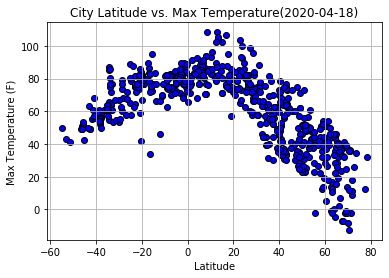

In [7]:
#Converting Date and time 
timestamp = WeatherPy_data_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

# Build Latitude vs. Temperature Plot
plt.scatter(WeatherPy_data_df["Lat"], WeatherPy_data_df["Max Temp"], marker="o", color = "blue",edgecolor = "black")

# Label the plot
plt.title(f"City Latitude vs. Max Temperature({shortened_timestamp})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("CityLatitude_vs_MaxTemperature.png")

# Show the plot
plt.show()



Latitude is in direct proportion to temperatures. The more the latitude, the more the temperatures.

#### Latitude vs. Humidity Plot

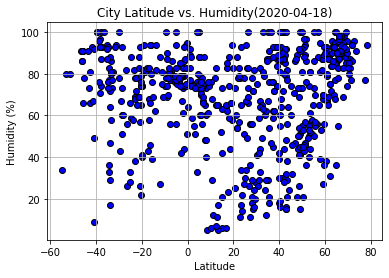

In [9]:
# Build Latitude vs. Humidity Plot
plt.scatter(WeatherPy_data_df["Lat"], WeatherPy_data_df["Humidity"], marker="o", color = "blue",edgecolor = "black")

# Label the plot
plt.title(f"City Latitude vs. Humidity({shortened_timestamp})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("CityLatitude_vs_Humidity.png")

# Show the plot
plt.show()

Latitude is in direct proportion to temperatures, however, it didn't depict much effect on humidity as such. We can have more concluded results if we were to plot "Humidity" variable against "Temperature."

#### Latitude vs. Cloudiness Plot

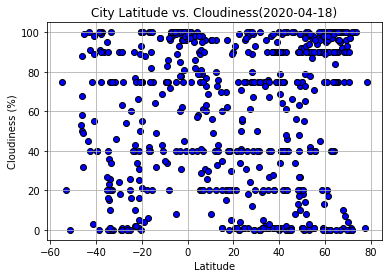

In [10]:
# Build Latitude vs. Cloudiness Plot
plt.scatter(WeatherPy_data_df["Lat"], WeatherPy_data_df["Cloudiness"], marker="o", color = "blue",edgecolor = "black")

# Label the plot
plt.title(f"City Latitude vs. Cloudiness({shortened_timestamp})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("CityLatitude_vs_Cloudiness.png")

# Show the plot
plt.show()

Latitude is in direct proportion to temperatures, however, it didn't depict much effect on cloudiness as such. We can have more concluded results if we were to plot "Cloudiness" variable against "Temperature."

#### Latitude vs. Wind Speed Plot

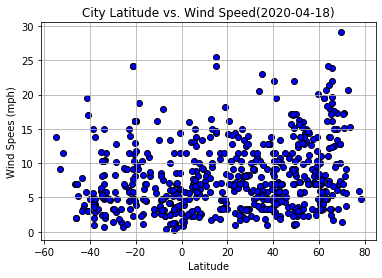

In [11]:
# Build Latitude vs. Wind Speed Plot
plt.scatter(WeatherPy_data_df["Lat"], WeatherPy_data_df["Wind Speed"], marker="o", color = "blue",edgecolor = "black")

# Label the plot
plt.title(f"City Latitude vs. Wind Speed({shortened_timestamp})")
plt.ylabel("Wind Spees (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the plot
plt.savefig("CityLatitude_vs_Wind Speed.png")

# Show the plot
plt.show()

Latitude is in direct proportion to temperatures, however, it didn't depict much effect on wind speed as such. We can have more concluded results if we were to plot "Wind Speed" variable against "Temperature."

## Linear Regression

In [12]:
# Create a function to create Linear Regression plots for all datasets
def LinearRegressionplot(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
# Get regression values
    linear_regression = x_values * slope + intercept
# Create line equation string
    linear_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,linear_regression,"r-" )

# Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(str(y_values.name))
    plt.annotate(linear_equation,(0,0), fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")

# Show plot
plt.show()

In [14]:
# Create Northern and Southern Hemisphere DataFrames
Northern_Hemisphere = WeatherPy_data_df.loc[WeatherPy_data_df['Lat'] > 0] 
Southern_Hemisphere = WeatherPy_data_df.loc[WeatherPy_data_df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8328817990209088


Text(0, 0.5, 'Max Temp')

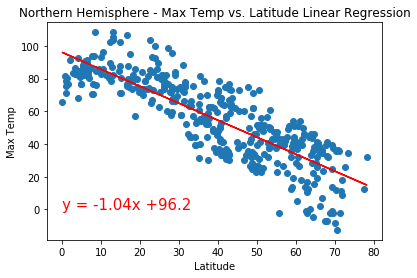

In [15]:
# Perform a linear regression on Max Temp vs. latitude
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

plt.title(f"Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel(str(y_values.name))


As we move up towards the northern hemisphere, the climate gets colder as it is depicted from the associated dip in temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6868625778656032


Text(0, 0.5, 'Max Temp')

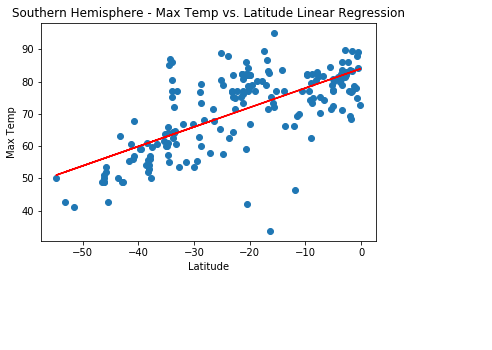

In [16]:
# Perform a linear regression on Max Temp vs. latitude
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Max Temp"]
LinearRegressionplot(x_values, y_values)

plt.title(f"Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel(str(y_values.name))


As we move down towards the southern hemisphere, the climate gets hotter as it is depicted from the associated rise in temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.28098150139166705


Text(0, 0.5, 'Humidity')

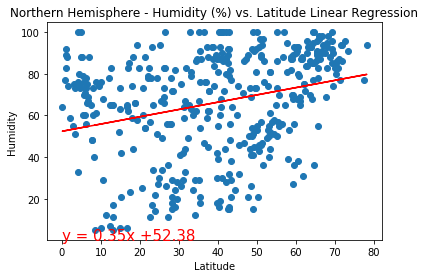

In [17]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel(str(y_values.name))

The associated humidity level tends to be a little lower for cooler temperatures.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0005390204697706854


Text(0, 0.5, 'Humidity')

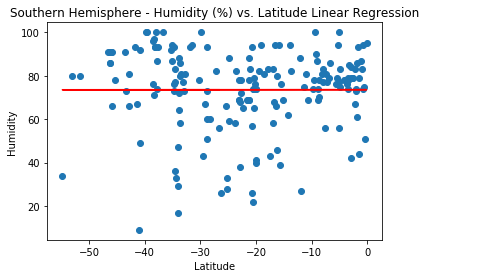

In [18]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Humidity"]
LinearRegressionplot(x_values, y_values)

plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel(str(y_values.name))

The associated humidity level tends to be a little higher for warmer temperatures.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07862112294224177


Text(0, 0.5, 'Cloudiness')

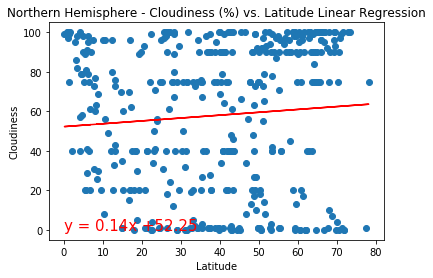

In [19]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel(str(y_values.name))

Cloudiness is almost independent of any latitude correlation.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.31631110317926164


Text(0, 0.5, 'Cloudiness')

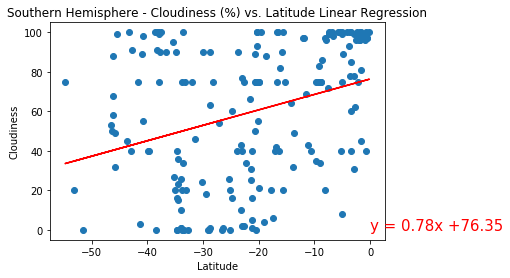

In [20]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Cloudiness"]
LinearRegressionplot(x_values, y_values)

plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel(str(y_values.name))

Cloudiness is almost independent of any latitude correlation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.194633857691957


Text(0, 0.5, 'Wind Speed')

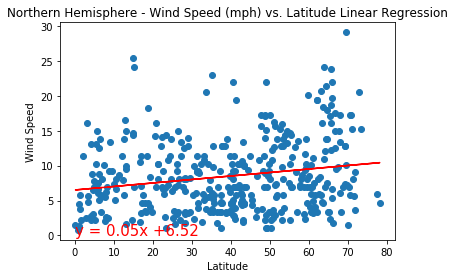

In [21]:
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel(str(y_values.name))

The wind speed ranges between 0 to 10 mph as depicted. High wind speed may occur in Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.0828805775180865


Text(0, 0.5, 'Wind Speed')

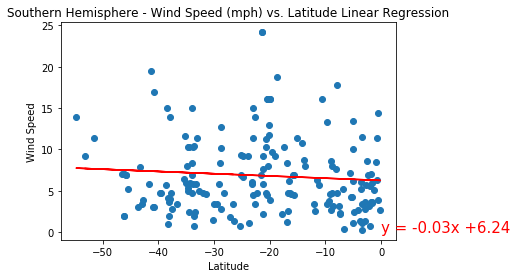

In [22]:
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Wind Speed"]
LinearRegressionplot(x_values, y_values)

plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel(str(y_values.name))

The wind speed ranges between 0 to 5 mph as depicted.